## ☀️ Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ✏️ Frame the Problem

The goal of this project is to create a classifier that has greater than 10% accuracy when it comes to correctly classfying an image from the MNIST dataset.

In [4]:
data_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [5]:
total_length = len(data_train) + len(data_test)

print(f" Training Data: {len(data_train)} | {len(data_train) / total_length}")
print(f" Test Data: {len(data_test)} | {len(data_test) / total_length}")

 Training Data: 42000 | 0.6
 Test Data: 28000 | 0.4


In [6]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_train.shape

(42000, 785)

In [8]:
data_train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
X = data_train.drop('label', axis=1)
y = data_train['label']

##  📊 EDA

In [10]:
print("Value Counts:")
print(data_train['label'].value_counts())

Value Counts:
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [11]:
print("Value Counts Distribution by Percentage:")
print((data_train['label'].value_counts() / len(data_train)) * 100)

Value Counts Distribution by Percentage:
1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64


<Axes: xlabel='label', ylabel='count'>

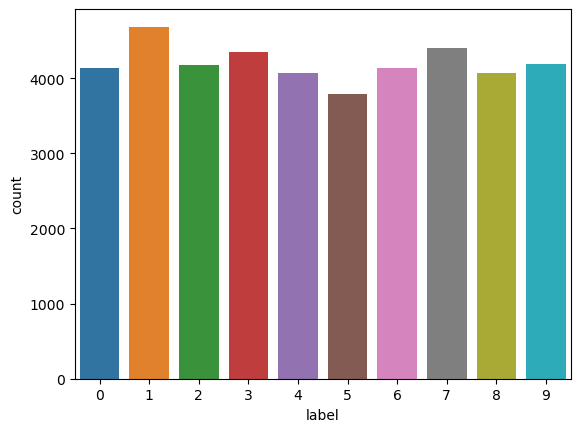

In [12]:
sns.countplot(x=y)

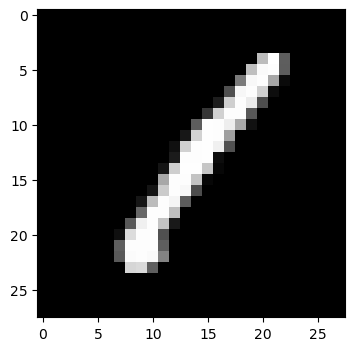

In [13]:
plt.figure(figsize=(15,4))

some_digit = X[0:1]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap="gray")

In [15]:
print(f"Label {y[0]}")

Label 1


## 🧑🏻‍💻 Prepare Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

##  💻 Select & Train Models

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

predictions = knn.predict(X_val)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

def print_accuracy_reports(predictions, labels):
    print("Confusion Matrix:")
    print("")
    print(confusion_matrix(y_val, predictions))
    print("")
    print("Classification Report:")
    print("")
    print(classification_report(y_val, predictions))

In [29]:
print_accuracy_reports(predictions, y_val)

Confusion Matrix:

[[407   0   0   0   0   0   1   0   0   0]
 [  0 470   0   0   0   0   1   0   0   0]
 [  3   5 405   0   1   0   1   4   0   1]
 [  0   2   3 485   0   6   0   4   4   2]
 [  0   1   0   0 383   0   1   1   0  11]
 [  0   0   0   3   0 329   4   0   2   1]
 [  3   0   0   0   0   2 397   0   0   0]
 [  0   9   2   0   0   0   0 423   0   4]
 [  0   4   2   5   1  10   3   1 373   4]
 [  1   1   1   5   1   0   0   7   0 400]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       408
           1       0.96      1.00      0.98       471
           2       0.98      0.96      0.97       420
           3       0.97      0.96      0.97       506
           4       0.99      0.96      0.98       397
           5       0.95      0.97      0.96       339
           6       0.97      0.99      0.98       402
           7       0.96      0.97      0.96       438
           8       0.98      0.93     

##  📈 Fine-Tune Models

In [20]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [1,3,5,7,9,11,13,15], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, grid_params, cv=3, scoring="accuracy", return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [21]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, y_train)

val_predictions = knn.predict(X_val)
print_accuracy_reports(val_predictions, y_val)

Confusion Matrix:

[[407   0   0   0   0   0   1   0   0   0]
 [  0 470   0   0   0   0   1   0   0   0]
 [  3   5 405   0   1   0   1   4   0   1]
 [  0   2   3 485   0   6   0   4   4   2]
 [  0   1   0   0 383   0   1   1   0  11]
 [  0   0   0   3   0 329   4   0   2   1]
 [  3   0   0   0   0   2 397   0   0   0]
 [  0   9   2   0   0   0   0 423   0   4]
 [  0   4   2   5   1  10   3   1 373   4]
 [  1   1   1   5   1   0   0   7   0 400]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       408
           1       0.96      1.00      0.98       471
           2       0.98      0.96      0.97       420
           3       0.97      0.96      0.97       506
           4       0.99      0.96      0.98       397
           5       0.95      0.97      0.96       339
           6       0.97      0.99      0.98       402
           7       0.96      0.97      0.96       438
           8       0.98      0.93     

## 🌎 Submission

In [66]:
predictions_test = knn.predict(data_test)

In [72]:
ImageId = pd.Series(data_test.index+1, name='ImageId')
Label = pd.Series(predictions_test, name='Label')

submission = pd.concat([ImageId, Label], axis=1)

In [73]:
submission.to_csv("submission.csv",index=False)